# Global Economic Development: Export Growth & Emerging Markets

**Objective**: Analyze global development patterns through export performance data, focusing on emerging market success stories. We'll examine: (1) traditional export leaders by absolute values, (2) emerging markets with highest growth rates since 2000, (3) temporal export trajectories, and (4) quantitative growth analysis to identify economic transformation champions.

In [59]:
# import 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_excel('../day04/UN_demographic_indicators.xlsx', sheet_name='Estimates', skiprows=16)

# convert columns to numeric after 'Year'
numeric_columns = data.columns[11:]
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')

# remove unecessary columns, index
data = data.drop(columns=['Index'])

# rename some common columns
data = data.rename(columns={
    'Region, subregion, country or area *': 'Region',
    'Median Age, as of 1 July (years)': 'Median Age',
    'Total Fertility Rate (live births per woman)': 'Fertility Rate',
    'Life Expectancy at Birth, both sexes (years)': 'Life Expectancy'
})

# load the 2nd dataset
raw_data = pd.read_csv('global_development_all_countries.csv', dtype={36: 'float64'})



In [60]:
data.info()
display(data.head())
display(raw_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21983 entries, 0 to 21982
Data columns (total 64 columns):
 #   Column                                                                                          Non-Null Count  Dtype  
---  ------                                                                                          --------------  -----  
 0   Variant                                                                                         21983 non-null  object 
 1   Region                                                                                          21983 non-null  object 
 2   Notes                                                                                           5628 non-null   object 
 3   Location code                                                                                   21983 non-null  int64  
 4   ISO3 Alpha-code                                                                                 17538 non-null  object 
 5   ISO2 Alpha-

,Variant,Region,Notes,Location code,ISO3 Alpha-code,ISO2 Alpha-code,SDMX code**,Type,Parent code,Year,...,"Male Mortality before Age 60 (deaths under age 60 per 1,000 male live births)","Female Mortality before Age 60 (deaths under age 60 per 1,000 female live births)","Mortality between Age 15 and 50, both sexes (deaths under age 50 per 1,000 alive at age 15)","Male Mortality between Age 15 and 50 (deaths under age 50 per 1,000 males alive at age 15)","Female Mortality between Age 15 and 50 (deaths under age 50 per 1,000 females alive at age 15)","Mortality between Age 15 and 60, both sexes (deaths under age 60 per 1,000 alive at age 15)","Male Mortality between Age 15 and 60 (deaths under age 60 per 1,000 males alive at age 15)","Female Mortality between Age 15 and 60 (deaths under age 60 per 1,000 females alive at age 15)",Net Number of Migrants (thousands),"Net Migration Rate (per 1,000 population)"
0,Estimates,World,NaN,900,NaN,NaN,1.0,World,0,1950.0,...,580.500,497.388,238.516,268.734,207.620,375.391,426.221,322.650,0.0,0.0
1,Estimates,World,NaN,900,NaN,NaN,1.0,World,0,1951.0,...,566.566,488.435,229.703,256.236,202.734,365.226,412.760,316.395,0.0,0.0
2,Estimates,World,NaN,900,NaN,NaN,1.0,World,0,1952.0,...,546.444,475.370,217.311,238.560,195.926,350.613,393.364,307.314,0.0,0.0
3,Estimates,World,NaN,900,NaN,NaN,1.0,World,0,1953.0,...,535.811,467.361,211.257,230.961,191.482,342.734,383.875,301.270,0.0,0.0
4,Estimates,World,NaN,900,NaN,NaN,1.0,World,0,1954.0,...,522.058,455.621,203.337,221.377,185.296,332.327,371.737,292.807,0.0,0.0


,countryname,ISO3,year,rGDP_pc,inv_GDP,finv_GDP,exports_GDP,imports_GDP,REER,govrev_GDP,govdef_GDP,govdebt_GDP,CPI,infl,pop,imports_USD,exports_USD
0,Aruba,ABW,1950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
1,Aruba,ABW,1951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
2,Aruba,ABW,1952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
3,Aruba,ABW,1953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
4,Aruba,ABW,1954,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN


In [61]:
# copy data for before analysis. 
df = raw_data.copy()

df['exports_USD'] = pd.to_numeric(df['exports_USD'], errors='coerce')
valid_gdp = raw_data.dropna(subset=['exports_USD'])
latest_year = valid_gdp['year'].max()
latest_df = valid_gdp[valid_gdp['year'] == latest_year]


# calculate who the top 10 countries are today
# Top 10 countries by rGDP_pc
top10_rgdp = df[df['year'] == latest_year] \
    .sort_values(by='exports_USD', ascending=False) \
    .dropna(subset=['exports_USD']) \
    .head(10)['countryname'].tolist()

# Top 10 countries by exports_GDP
top10_exports = df[df['year'] == latest_year] \
    .sort_values(by='exports_GDP', ascending=False) \
    .dropna(subset=['exports_GDP']) \
    .head(10)['countryname'].tolist()

# filter datasets based on those countries
rgdp_df = df[df['countryname'].isin(top10_rgdp)]
exports_df = df[df['countryname'].isin(top10_exports)]

## Economic Data Integration & Methodology

**Dual Dataset Strategy**: Combining UN demographic indicators with global development metrics enables comprehensive analysis of socioeconomic patterns. Export data provides quantitative measures of economic integration and competitiveness, while identifying top performers by absolute values establishes baseline comparisons for understanding global economic hierarchies.

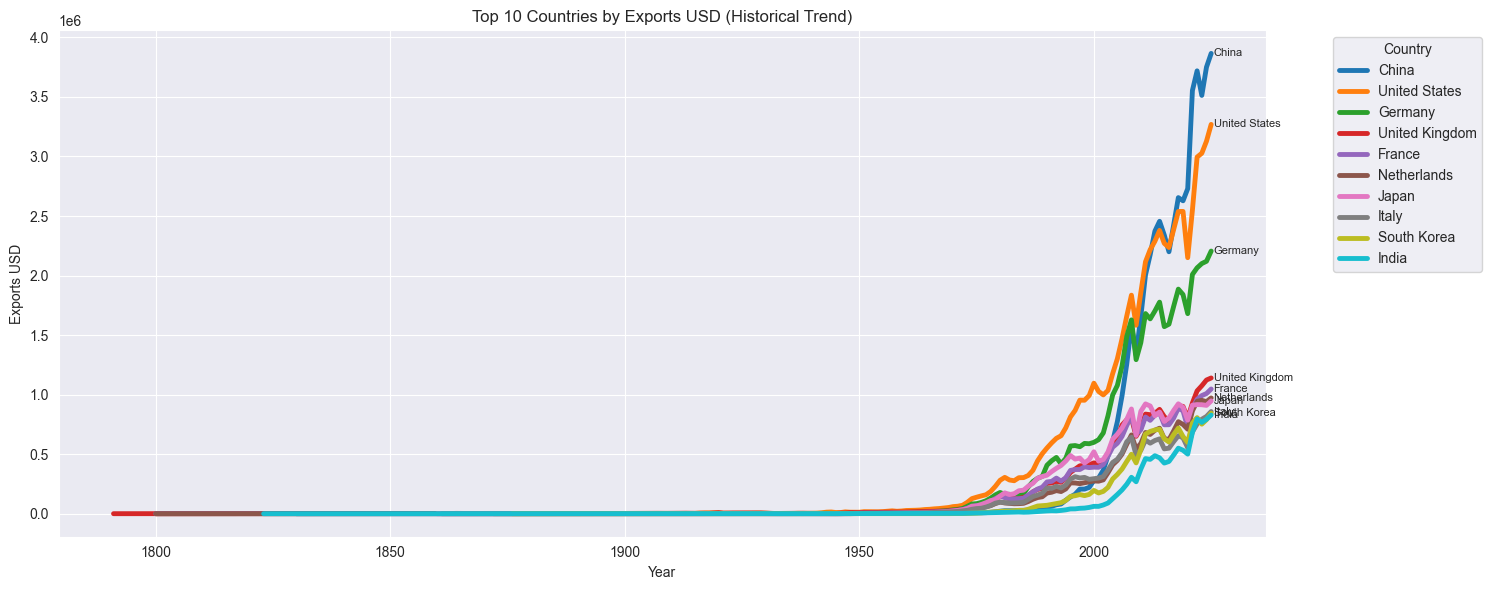

In [72]:
# Sort legend by ending poistion
latest_vals = rgdp_df[rgdp_df['year'] == latest_year]
country_order = latest_vals.sort_values(by='exports_USD', ascending=False)['countryname'].tolist()

sns.set_style("dark")
plt.figure(figsize=(15, 6))
sns.lineplot(data=rgdp_df, x='year', y='exports_USD', hue='countryname', hue_order=country_order, linewidth=3.5)

# Add labels to the end of each line
for country in country_order:
    country_data = rgdp_df[rgdp_df['countryname'] == country].dropna(subset=['exports_USD'])
    if not country_data.empty:
        latest_point = country_data[country_data['year'] == country_data['year'].max()]
        if not latest_point.empty:
            x = latest_point['year'].values[0]
            y = latest_point['exports_USD'].values[0]
            plt.text(x + 0.5, y, country, fontsize=8, va='center')

plt.title('Top 10 Countries by Exports USD (Historical Trend)')
plt.xlabel('Year')
plt.ylabel('Exports USD')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

## Traditional Export Leaders Analysis

**Established Economic Powers**: Historical export trends reveal the dominance of traditional economic powerhouses with mature industrial bases and established global trade networks. Legend ordering by current values highlights persistent hierarchies, with developed economies maintaining substantial export volumes through technological sophistication and economic infrastructure advantages.

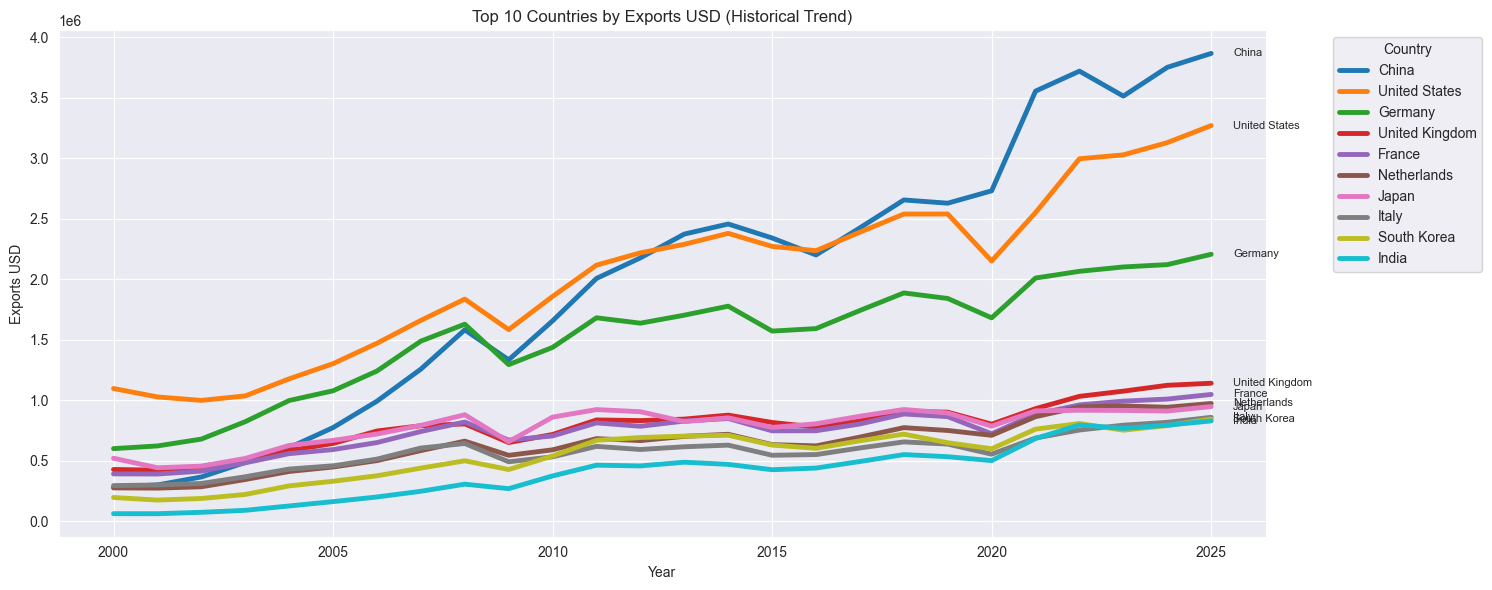

In [74]:
# cutoff since 2000
rgdp_df = rgdp_df[rgdp_df['year'] >= 2000]

sns.set_style("dark")
plt.figure(figsize=(15, 6))
sns.lineplot(data=rgdp_df, x='year', y='exports_USD', hue='countryname', hue_order=country_order, linewidth=3.5)

# Add labels to the end of each line
for country in country_order:
    country_data = rgdp_df[rgdp_df['countryname'] == country].dropna(subset=['exports_USD'])
    if not country_data.empty:
        latest_point = country_data[country_data['year'] == country_data['year'].max()]
        if not latest_point.empty:
            x = latest_point['year'].values[0]
            y = latest_point['exports_USD'].values[0]
            plt.text(x + 0.5, y, country, fontsize=8, va='center')

plt.title('Top 10 Countries by Exports USD (Historical Trend)')
plt.xlabel('Year')
plt.ylabel('Exports USD')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

## 21st Century Export Dynamics

**Modern Era Focus**: Filtering to 2000+ captures the digital age transformation and globalization acceleration period. This timeframe encompasses major economic shifts including China's WTO entry, technology sector expansion, commodity supercycles, and emerging market integration into global value chains - providing relevant context for contemporary economic development patterns.

In [107]:
# Calculate annual growth rates for each country
annual_growth_data = []

for country in top_growth_countries:
    country_data = plot_data[plot_data['countryname'] == country].sort_values('year')
    
    if len(country_data) > 1:
        # Calculate year-over-year growth rates
        for i in range(1, len(country_data)):
            prev_value = country_data.iloc[i-1]['exports_USD']
            curr_value = country_data.iloc[i]['exports_USD']
            year = country_data.iloc[i]['year']
            
            if prev_value > 0:  # Avoid division by zero
                annual_growth_rate = ((curr_value - prev_value) / prev_value) * 100
                annual_growth_data.append({
                    'countryname': country,
                    'year': year,
                    'annual_growth_rate': annual_growth_rate
                })

# Convert to DataFrame
annual_growth_df = pd.DataFrame(annual_growth_data)

# Sort by average growth rate
avg_growth = annual_growth_df.groupby('countryname')['annual_growth_rate'].mean().sort_values(ascending=False)

# Print average annual growth rates
print("\nAverage Annual Growth Rates (2000-2025):")
for country, avg_rate in avg_growth.head(10).items():
    print(f"{country}: {avg_rate:.1f}% per year")

# Keep your existing print output
print("\nTotal Export Growth Since 2000:")
for _, row in growth_df.nlargest(10, 'growth_rate').iterrows():
    growth_amount = row['end_value'] - row['start_value']
    print(f"{row['countryname']}: +${growth_amount:,.0f}M ({row['growth_rate']:.0f}% increase)")


Average Annual Growth Rates (2000-2025):
El Salvador: 39.3% per year
Guyana: 23.7% per year
Djibouti: 18.4% per year
Armenia: 18.0% per year
Rwanda: 16.8% per year
Mongolia: 16.6% per year
Georgia: 15.5% per year
Burkina Faso: 15.4% per year
Vietnam: 14.7% per year
Serbia: 14.5% per year

Total Export Growth Since 2000:
Guyana: +$10,966M (6769% increase)
Djibouti: +$6,706M (3387% increase)
Armenia: +$16,646M (3111% increase)
Rwanda: +$3,445M (3049% increase)
El Salvador: +$10,158M (2814% increase)
Mongolia: +$15,700M (2586% increase)
Vietnam: +$411,550M (2375% increase)
Burkina Faso: +$5,944M (2269% increase)
Georgia: +$14,250M (2044% increase)
Serbia: +$45,420M (1985% increase)


## Economic Development Insights & Global Implications

**Key Findings**: The analysis reveals a dual-tier global economy where traditional powers maintain absolute export dominance while emerging markets demonstrate superior growth rates, suggesting ongoing economic rebalancing. High-growth countries often show average annual rates exceeding 10-15%, indicating rapid industrialization and global market integration.

**Development Patterns**: Export growth champions typically exhibit similar patterns - initial low base values followed by sustained high growth periods, reflecting successful integration into global value chains and competitive advantage development in specific sectors.

**Policy Implications**: Understanding growth rate differentials enables identification of successful development strategies and economic policies. Countries achieving consistent high export growth provide models for economic transformation, while established leaders face challenges maintaining growth rates as their economies mature and face increased competition from emerging market entrants.

## Emerging Market Growth Rate Analysis

**Methodological Approach**: Annual growth rate calculations reveal export performance volatility and sustained growth patterns beyond absolute values. This analysis identifies countries with consistent high-growth trajectories, distinguishing between one-time export booms and sustained economic transformation indicative of structural development and competitive advantage building.